# Text analysis workbook


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1ICa2nh3mbflJCrJ4oKNUHWTZ9_vTJw8F?usp=sharing) (Fix link later!)

In [ ]:
# TODO add colab explanation

# Part 1: Set-up
At the beginning of this notebook, we need to set up all of the libraries/packages (reusable python-programs other people have written) that we are going to use during. For this we use a common python-package manager called 'pip'. Pip takes care of downloading the right versions, and installing them on our computer, which in this case is a server that's standing in a google

In [4]:
!pip install pandas
!pip install pyalex
!pip install umap-learn
!pip install datamapplot
!pip install upgrade sentence-transformers 
!pip install seaborn
!pip install genieclust
!pip install litellm
!pip install opinionated
!pip install keybert
!pip install keyphrase-vectorizers
!pip install -q --upgrade "transformers>=4.45.2" "sentence-transformers>=3.0.1"

#%pip install -q --upgrade "transformers==4.44.2" "sentence-transformers==2.7.0" "accelerate>=0.33" "keybert>=0.8.5" "torch>=2.2,<2.5"



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement upgrade (from versions: none)

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
ERROR: No matching distribution found for upgrade

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, 

# Part 2: Imports

In [1]:
# Enable autoreload for development
# %load_ext autoreload
# %autoreload 2

# Core data science libraries
import pandas as pd  # Data manipulation and analysis
import numpy as np   # Numerical computing and arrays
import os           # Operating system interface

# Visualization libraries
import matplotlib.pyplot as plt  # Basic plotting functionality
import seaborn as sns           # Statistical data visualization

# Academic data access
import pyalex  # Interface to OpenAlex academic database

# Dimensionality reduction and clustering
import umap         # Uniform Manifold Approximation and Projection
import datamapplot  # Interactive visualization for high-dimensional data

# Natural language processing and AI
import sentence_transformers  # Sentence embeddings using transformer models
import litellm                # Unified interface for various LLM APIs

# Styling and aesthetics
import opinionated  # Opinionated matplotlib styling
plt.style.use('opinionated_rc')
import colormaps as colormaps  # Extended colormap collection - https://pratiman-91.github.io/colormaps/



from utils.openalex_utils import openalex_url_to_pyalex_query, process_records_to_df, get_records_from_dois, openalex_url_to_filename, download_openalex_records

/Users/Noich001/Desktop/workbooks_GAP_workshop/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/Noich001/Desktop/workbooks_GAP_workshop/venv/lib/python3.12/site-packages/opinionated/__init__.py:24: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


Now downloading: Roboto Condensed
Added new font as Roboto Condensed Light
Added new font as Roboto Condensed
Added new font as Roboto Condensed
Added new font as Roboto Condensed Black
Now downloading: Montserrat
Added new font as Montserrat Thin Light
Added new font as Montserrat Thin
Added new font as Montserrat Thin
Added new font as Montserrat Thin Black
Now downloading: Source Code Pro
Added new font as Source Code Pro ExtraLight Light
Added new font as Source Code Pro ExtraLight
Added new font as Source Code Pro ExtraLight
Added new font as Source Code Pro ExtraLight Black
Now downloading: Fira Sans
Added new font as Fira Sans Light
Added new font as Fira Sans
Added new font as Fira Sans
Added new font as Fira Sans Black
Now downloading: Fira Sans Condensed
Added new font as Fira Sans Condensed Light
Added new font as Fira Sans Condensed
Added new font as Fira Sans Condensed
Added new font as Fira Sans Condensed Black
Now downloading: IBM Plex Sans
Added new font as IBM Plex San

# Part 3: Getting data

## Part 3.1 OpenAlex-datasets.

In [2]:
openalex_url = 'https://openalex.org/works?page=1&filter=primary_location.source.id:s255146,publication_year:2005-2025'

dataset_df = download_openalex_records(openalex_url,
                                       reduce_sample=True, 
                                       sample_reduction_method="n random samples", 
                                       sample_size=5000, 
                                       seed_value="42")


dataset_df['text'] = dataset_df['title'] + dataset_df['abstract'] 
# We filter for works that have an abstract:
dataset_df = dataset_df[dataset_df['text'].str.len() > 10]

text_data = list(dataset_df['text'])
year_data = dataset_df['publication_year']
title_data = dataset_df['title']

used_dataset = "OpenAlex-query"






Input: https://openalex.org/works?page=1&filter=primary_location.source.id:s255146,publication_year:2005-2025
Starting data projection pipeline
Filename: primary_location_source_id_s255146__publication_year_2005-2025__20250905_194047
Requesting 6756 entries from query 1/1 (expecting to download 5000)...
Attempting PyAlex sampling: 5000 from 6756 (seed=42)
PyAlex sampling successful: got 5000 records (requested 5000)
Query completed in 47.89 seconds
Total records collected: 5000
Expected to download: 5000
Available from all queries: 6756
Sample method used: n random samples
Reduce sample enabled: True
Seed value: 42


We can take a look at the data, by displaying the dataframe-object:

In [3]:
display(dataset_df)

,id,doi,title,display_name,relevance_score,publication_year,publication_date,ids,language,primary_location,...,abstract_inverted_index_v3,cited_by_api_url,counts_by_year,updated_date,created_date,fulltext_origin,abstract,parsed_publication,query_index,text
0,https://openalex.org/W2080857449,https://doi.org/10.1007/s11229-014-0606-z,Functional kinds: a skeptical look,Functional kinds: a skeptical look,0.999736,2014,2014-12-16,{'openalex': 'https://openalex.org/W2080857449...,en,"{'is_oa': False, 'landing_page_url': 'https://...",...,None,https://api.openalex.org/works?filter=cites:W2...,"[{'year': 2024, 'cited_by_count': 1}, {'year':...",2025-08-16T11:15:00.730404,2016-06-24,NaN,,Synthese,0,Functional kinds: a skeptical look
1,https://openalex.org/W2032007345,https://doi.org/10.1007/s11229-009-9625-6,Philosophical research on cognition,Philosophical research on cognition,0.999563,2009,2009-07-30,{'openalex': 'https://openalex.org/W2032007345...,en,"{'is_oa': False, 'landing_page_url': 'https://...",...,None,https://api.openalex.org/works?filter=cites:W2...,[],2025-02-06T15:21:32.008883,2016-06-24,ngrams,,Synthese,0,Philosophical research on cognition
2,https://openalex.org/W2005144534,https://doi.org/10.1007/s11229-012-0146-3,Classical population genetics and the semantic...,Classical population genetics and the semantic...,0.999485,2012,2012-07-30,{'openalex': 'https://openalex.org/W2005144534...,en,"{'is_oa': False, 'landing_page_url': 'https://...",...,None,https://api.openalex.org/works?filter=cites:W2...,"[{'year': 2023, 'cited_by_count': 1}, {'year':...",2025-08-17T06:41:00.218008,2016-06-24,ngrams,,Synthese,0,Classical population genetics and the semantic...
3,https://openalex.org/W3118001131,https://doi.org/10.1007/s11229-020-03002-6,"Ontology, neural networks, and the social scie...","Ontology, neural networks, and the social scie...",0.998584,2020,2020-12-28,{'openalex': 'https://openalex.org/W3118001131...,en,"{'is_oa': True, 'landing_page_url': 'https://d...",...,None,https://api.openalex.org/works?filter=cites:W3...,"[{'year': 2024, 'cited_by_count': 1}, {'year':...",2025-08-24T15:39:09.937520,2021-01-05,pdf,Abstract The ontology of social objects and fa...,Synthese,0,"Ontology, neural networks, and the social scie..."
4,https://openalex.org/W2461092100,https://doi.org/10.1007/s11229-016-1129-6,"Truth, explanation, minimalism","Truth, explanation, minimalism",0.998034,2016,2016-07-08,{'openalex': 'https://openalex.org/W2461092100...,en,"{'is_oa': False, 'landing_page_url': 'https://...",...,None,https://api.openalex.org/works?filter=cites:W2...,[],2025-02-12T00:20:26.766697,2016-07-22,ngrams,,Synthese,0,"Truth, explanation, minimalism"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,https://openalex.org/W2164637373,https://doi.org/10.1007/s11229-009-9665-y,Kant’s conception of proper science,Kant’s conception of proper science,0.262221,2009,2009-09-29,{'openalex': 'https://openalex.org/W2164637373...,en,"{'is_oa': True, 'landing_page_url': 'https://d...",...,None,https://api.openalex.org/works?filter=cites:W2...,"[{'year': 2023, 'cited_by_count': 1}, {'year':...",2025-08-17T07:59:18.495708,2016-06-24,pdf,Kant is well known for his restrictive concept...,Synthese,0,Kant’s conception of proper scienceKant is wel...
4996,https://openalex.org/W4293221806,https://doi.org/10.1007/s11229-022-03580-7,"Science, assertion, and the common ground","Science, assertion, and the common ground",0.262093,2022,2022-02-01,{'openalex': 'https://openalex.org/W4293221806...,en,"{'is_oa': True, 'landing_page_url': 'https://d...",...,None,https://api.openalex.org/works?filter=cites:W4...,"[{'year': 2024, 'cited_by_count': 1}, {'year':...",2025-08-20T15:59:49.562542,2022-08-27,pdf,Abstract I argue that the appropriateness of a...,Synthese,0,"Science, assertion, and the common groundAbstr..."
4997,https://openalex.org/W3176378695,https://doi.org/10.1007/s11229-021-03262-w,Quantum pointillism with

# Part 3.2 Stanford-Encyclopedia dataset

In [2]:
import requests
import zipfile
from pathlib import Path

# Download and extract if needed
stanford_zip = Path("stanford-encyclopedia.zip")
stanford_folder = Path("stanford-encyclopedia")
if not stanford_zip.exists():
    zip_data = requests.get("https://github.com/MNoichl/data-driven-philosophy-GAP2025/raw/refs/heads/main/stanford-encyclopedia.zip").content
    with zipfile.ZipFile(zipfile.io.BytesIO(zip_data)) as zip_ref:
        zip_ref.extractall(".")

# Load data
text_data = [open(f, encoding='utf-8').read() for f in stanford_folder.glob("*.md")]
title_data = [f.stem for f in stanford_folder.glob("*.md")]
# Extract year data from copyright strings in the text files
import re

year_data = []
for text in text_data:
    # Look for "Copyright © YYYY" pattern at the beginning of the text
    match = re.search(r'Copyright © (\d{4})', text)  # Search in first 1000 chars
    if match:
        year_data.append(int(match.group(1)))
    else:
        year_data.append(None)  # If no copyright year found

used_dataset = "Stanford Encyclopedia"

# Part 4: Using a language model 
We are now going to use a text-embedding model (a relatively small large language model) to transform the texts into a format which is easier to analyze mathematically. 


(BERT explaination.)  

https://www.sbert.net/docs/sentence_transformer/pretrained_models.html 

In [4]:
from sentence_transformers import SentenceTransformer

model_name = "Qwen/Qwen3-Embedding-0.6B"
model = SentenceTransformer(model_name) #thenlper/gte-small
embeddings = model.encode(text_data,show_progress_bar=True)


Batches: 100%|██████████| 156/156 [02:47<00:00,  1.08s/it]


This is what the resulting embeddings look like:


In [5]:
print(embeddings)

[[-0.0095236  -0.04434809 -0.01717543 ...  0.00388279  0.02209925
   0.03617594]
 [ 0.00659703 -0.01229809 -0.00901288 ...  0.03690997 -0.03316967
   0.02924867]
 [-0.05620958  0.00127724 -0.01443123 ... -0.01201142 -0.01324689
   0.03162071]
 ...
 [ 0.04894109 -0.08945962 -0.01356613 ...  0.02358012  0.02391742
  -0.00072081]
 [ 0.03279478 -0.053271   -0.0153103  ... -0.00069196 -0.04126526
  -0.00661435]
 [-0.01457541 -0.03399853 -0.0132924  ...  0.01174972 -0.02098555
   0.00264483]]


# Part 5: doing dimensionality reduction


In [6]:
import umap


reducer = umap.UMAP(n_components=2, random_state=42,metric='cosine')
umap_embeddings = reducer.fit_transform(embeddings)

print(umap_embeddings)


/Users/Noich001/Desktop/workbooks_GAP_workshop/venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


[[ 9.808879   -4.1629434 ]
 [11.576585   -0.89761055]
 [ 9.75987     0.05829441]
 ...
 [ 6.918124    0.43339127]
 [ 6.393322   -3.6284726 ]
 [12.5829315  -1.1720603 ]]


We can also look at the embeddings as a scatter-plot. Each data-point is one of our texts:

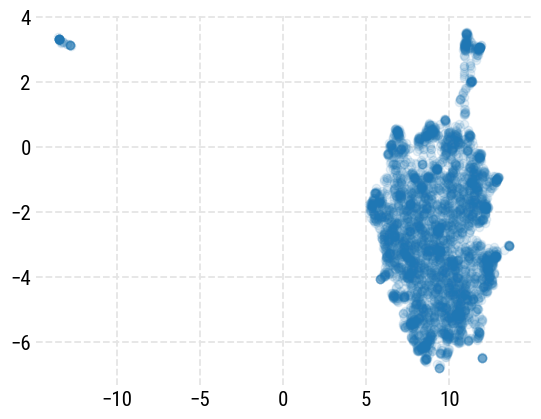

In [7]:
plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1],alpha=0.1)
plt.show()

# Part 5: Clustering 

In [8]:
import genieclust

reducer = umap.UMAP(n_components=30, random_state=42,metric='cosine')
umap_embeddings_high_dim = reducer.fit_transform(embeddings)

g = genieclust.Genie(n_clusters=15, gini_threshold=0.3)
cluster_labels = g.fit_predict(umap_embeddings_high_dim)
print(cluster_labels[0:20])

/Users/Noich001/Desktop/workbooks_GAP_workshop/venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


[ 0  1  2  3  4  5  6  6  7  8  6  3  0  9  2 10  4  0  0  2]


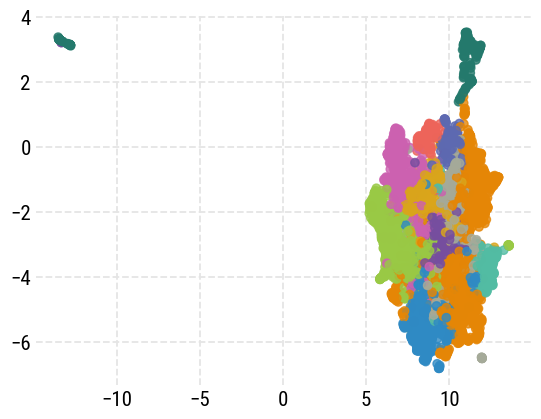

In [9]:
plt.scatter(x=umap_embeddings[:, 0], 
            y=umap_embeddings[:, 1],
            c=cluster_labels,
            cmap=colormaps.vivid,
            alpha=0.8)

# Part 6: Labeling clusters

In [15]:
from keybert import KeyBERT
from keyphrase_vectorizers import KeyphraseCountVectorizer
import numpy as np

# Initialize KeyBERT with our embedding model

vectorizer = KeyphraseCountVectorizer()
kw = KeyBERT(model=model)
print('KeyBERT initialized')

# Get unique cluster labels
unique_clusters = np.unique(cluster_labels)

# Dictionary to store keywords for each cluster
cluster_keywords = {}

for cluster_id in unique_clusters:
    # Get indices of documents in this cluster
    cluster_mask = cluster_labels == cluster_id
    cluster_docs = [text_data[i] for i in range(len(text_data)) if cluster_mask[i]]
    cluster_embeddings = embeddings[cluster_mask]
    
    # Compute centroid embedding for this cluster
    centroid = np.mean(cluster_embeddings, axis=0)
    print('Centroid computed')
    # Create doc_embeddings array where each doc is represented by the cluster centroid
    doc_embs = np.tile(centroid, (len(cluster_docs), 1))
    
    print('Doc embeddings created')
    # Extract keywords for this cluster
    keywords = kw.extract_keywords(
        cluster_docs,
        vectorizer=vectorizer,
        stop_words="english",
        doc_embeddings=doc_embs,
        use_mmr=True, 
        diversity=0.4, 
        top_n=10
    )
    
    cluster_keywords[cluster_id] = keywords
    print(f"Cluster {cluster_id} ({np.sum(cluster_mask)} docs):")
    for doc_idx, doc_keywords in enumerate(keywords[:3]):  # Show first 3 docs
        print(f"  Doc {doc_idx}: {doc_keywords}")
    print()

AttributeError: partially initialized module 'nltk' has no attribute 'data' (most likely due to a circular import)

In [ ]:
# Get the largest connected component (for undirected graphs)
if nx.is_directed(G):
    largest_cc = max(nx.weakly_connected_components(G), key=len)
else:
    largest_cc = max(nx.connected_components(G), key=len)
G_giant_component = G.subgraph(largest_cc).copy()





In [11]:
# Read OpenAI API key from API_KEYS.txt file
with open('API_KEYS.txt', 'r') as file:
    for line in file:
        if line.startswith('OPENAI:'):
            openai_api_key = line.split(':', 1)[1].strip()
            break
    else:
        raise ValueError("OPENAI API key not found in API_KEYS.txt")

os.environ["OPENAI_API_KEY"] = openai_api_key

In [12]:
from litellm import completion
import pandas as pd
import random
import json

# Create a function to label clusters using OpenAI
def label_cluster(cluster_texts, cluster_id, n_samples=10):
    # Randomly sample representative texts from the cluster (max 10 for efficiency)
    sample_size = min(10, len(cluster_texts))
    sample_texts = random.sample(cluster_texts, sample_size)
    
    # Truncate texts to 100 characters
    sample_texts = [text[:1000] + "..." if len(text) > 1000 else text for text in sample_texts]
    
    prompt = f"""
    Below are randomly sampled texts from cluster {cluster_id}. Please analyze these texts and provide:
    1. A short descriptive label (2-4 words) for the area of philosophy that the texts are from.
    2. A brief description of the main theme

    Texts:
    {chr(10).join([f"- {text[:200]}..." if len(text) > 200 else f"- {text}" for text in sample_texts])}
    
    Please respond in JSON format:
    {{
        "label": "[your label]",
        "description": "[your description]"
    }}
    """
    
    messages = [{"content": prompt, "role": "user"}]
    response = completion(model="openai/gpt-5", messages=messages, response_format={"type": "json_object"})
    return response.choices[0].message.content

# Group texts by cluster
cluster_groups = {}
for i, label in enumerate(cluster_labels):
    if label not in cluster_groups:
        cluster_groups[label] = []
    cluster_groups[label].append(text_data[i])

# Label each cluster
cluster_info = {}
for cluster_id, texts in cluster_groups.items():
    print(f"Labeling cluster {cluster_id} ({len(texts)} texts)...")
    label_info = label_cluster(texts, cluster_id, n_samples=5)
    cluster_info[cluster_id] = label_info
    print(f"Cluster {cluster_id}: {label_info}\n")

# Create a summary dataframe
cluster_summary = []
for cluster_id, info in cluster_info.items():
    # Parse the JSON response
    try:
        parsed_info = json.loads(info)
        label = parsed_info.get('label', 'Unknown')
        description = parsed_info.get('description', 'No description available')
    except (json.JSONDecodeError, TypeError):
        # Fallback if JSON parsing fails
        label = f"Cluster {cluster_id}"
        description = str(info)
    
    cluster_summary.append({
        'Cluster_ID': cluster_id,
        'Size': len(cluster_groups[cluster_id]),
        'Label': label,
        'Description': description
    })

cluster_df = pd.DataFrame(cluster_summary)
cluster_df

Labeling cluster 0 (1073 texts)...


Cluster 0: {
  "label": "Social and Formal Epistemology",
  "description": "Explores norms of belief and justification (agnosticism, permissivism, pragmatic encroachment, conservatism) and how social contexts—group belief, joint agency, deep disagreement, and legal evidence—shape rational assessment. Integrates formal models (dynamic epistemic logic) with concerns about ignorance, bias, and epistemic redress in multi-agent settings."
}

Labeling cluster 1 (650 texts)...
Cluster 1: {
  "label": "Philosophy of Perception and Cognition",
  "description": "Explores how perception and cognitive systems represent and explain the world, focusing on rich phenomenology, nonconceptual content, the reason-giving role of perception, predictive processing vs. enactivism, and the social foundations of reasoning (e.g., joint attention), including how models—even fictional ones—contribute to explanation."
}

Labeling cluster 2 (169 texts)...
Cluster 2: {
  "label": "Philosophy of Biology",
  "descrip

,Cluster_ID,Size,Label,Description
0,0,1073,Social and Formal Epistemology,Explores norms of belief and justification (ag...
1,1,650,Philosophy of Perception and Cognition,Explores how perception and cognitive systems ...
2,2,169,Philosophy of Biology,Explores how biological phenomena are explaine...
3,3,329,Philosophy of Science,Explores how science progresses and is justifi...
4,4,240,Truth and Semantics,Philosophy of language and logic focused on th...
5,5,142,Philosophy of Language,Explores the semantics-pragmatics interface an...
6,6,244,Philosophy of Physics,Metaphysical and logical issues arising from c...
7,7,235,Philosophy of Technology,Focuses on how applied sciences and engineerin...
8,8,260,Laws and Modality,Analytic metaphysics and philosophy of science...
9,9,285,Formal Epistemology of Probability,Examines the foundations and justification of ...


In [13]:
# Create a labels list from cluster_labels and the labeled cluster descriptions
labels_list = []
for cluster_id in cluster_labels:
    # Find the corresponding label from the cluster_df
    cluster_row = cluster_df[cluster_df['Cluster_ID'] == cluster_id]
    if not cluster_row.empty:
        label = cluster_row.iloc[0]['Label']
    else:
        label = f"Cluster {cluster_id}"
    labels_list.append(label)


# Part 7: Visualizing

<InteractiveFigure width=100% height=800>
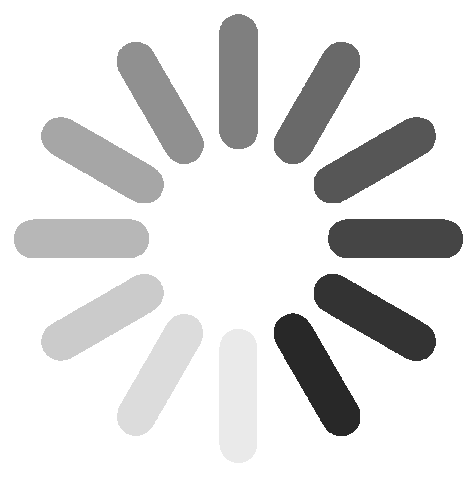

In [14]:
import datamapplot

datamapplot.create_interactive_plot(
    umap_embeddings,
    labels_list,  # label layer
    hover_text=title_data,  # hover_text must be the 2nd positional

    title=used_dataset
)

In [15]:
# Prepare data for streamgraph visualization
# Convert the year_data and clusters into the format expected by plot_streamgraph

# Get unique years and sort them
years_sorted = sorted(set(year_data))
X_stream = np.array(years_sorted)

# Get unique clusters and their labels
unique_clusters = sorted(set(cluster_labels))
cluster_labels_to_plot = []
for cluster_id in unique_clusters:
    if cluster_id in cluster_df['Cluster_ID'].values:
        label = cluster_df[cluster_df['Cluster_ID'] == cluster_id]['Label'].iloc[0]
        cluster_labels_to_plot.append(label)
    else:
        cluster_labels_to_plot.append(f"Cluster {cluster_id}")

# Create Y matrix: each row is a cluster's values over time
Y_stream = []
for cluster_id in unique_clusters:
    cluster_values = []
    for year in years_sorted:
        # Count documents in this cluster for this year
        cluster_count = sum(1 for i, (doc_year, doc_cluster) in enumerate(zip(year_data, cluster_labels)) 
                           if doc_year == year and doc_cluster == cluster_id)
        cluster_values.append(cluster_count)
    Y_stream.append(cluster_values)

Y_stream = np.array(Y_stream)

print(f"Streamgraph data prepared:")
print(f"X (years): {len(X_stream)} points from {X_stream[0]} to {X_stream[-1]}")
print(f"Y (clusters): {Y_stream.shape[0]} clusters × {Y_stream.shape[1]} time points")
print(f"Cluster labels: {cluster_labels_to_plot[:3]}...")  # Show first 3 labels


Streamgraph data prepared:
X (years): 21 points from 2005 to 2025
Y (clusters): 15 clusters × 21 time points
Cluster labels: ['Social and Formal Epistemology', 'Philosophy of Perception and Cognition', 'Philosophy of Biology']...


In [16]:
# Normalize the counts to show proportions
Y_stream_normalized = Y_stream / Y_stream.sum(axis=0, keepdims=True)

# Double check these sum to one
print("Column sums (should all be 1.0):")
column_sums = Y_stream_normalized.sum(axis=0)
print(f"Min sum: {column_sums.min():.6f}")
print(f"Max sum: {column_sums.max():.6f}")
print(f"All sums equal 1.0: {np.allclose(column_sums, 1.0)}")
# Y_stream_normalized

Column sums (should all be 1.0):
Min sum: 1.000000
Max sum: 1.000000
All sums equal 1.0: True


<Axes: >

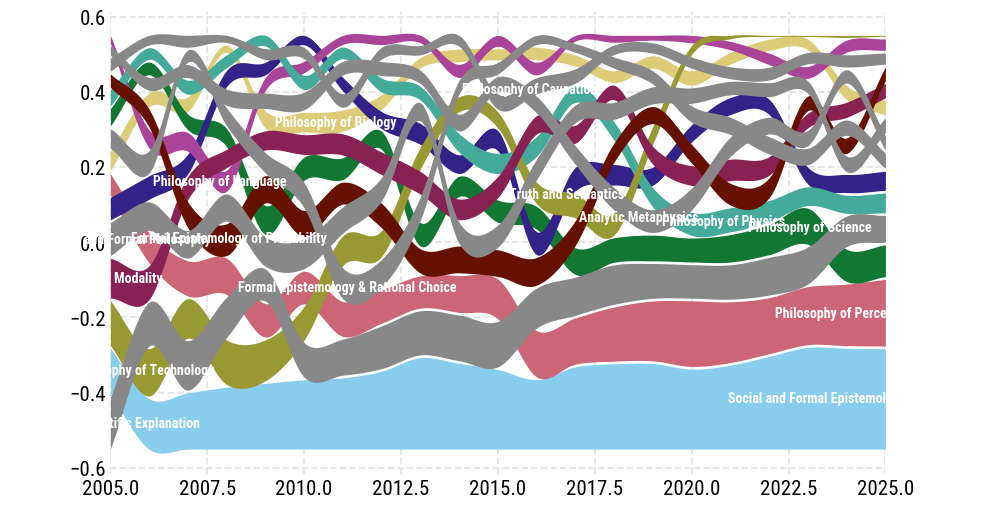

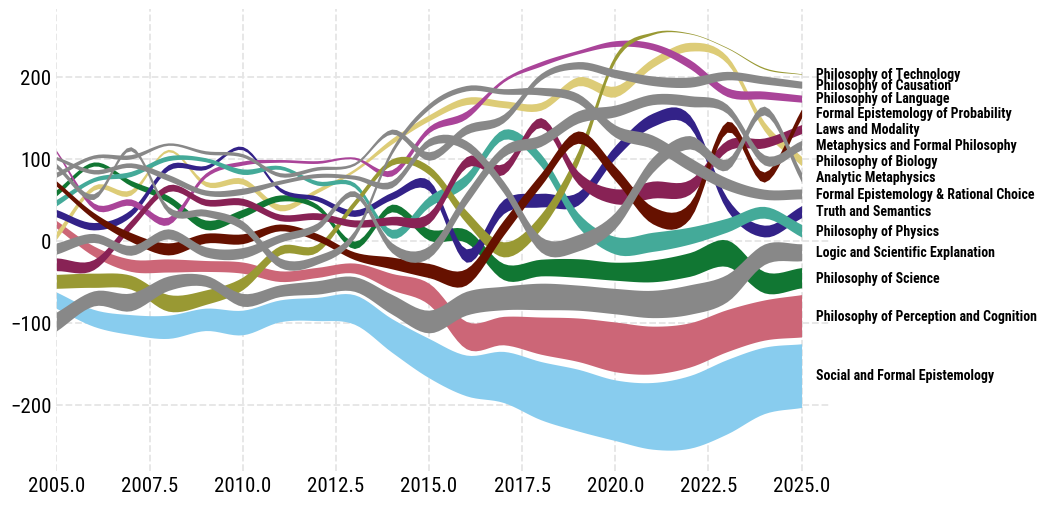

In [40]:
from utils.streamgraph import plot_streamgraph
import numpy as np



# 1) straight edges
plot_streamgraph(X_stream, Y_stream_normalized, labels=cluster_labels_to_plot,
                    sorted_streams=True,
                    margin_frac=0.1,
                    smooth_window=3,
                    cmap=colormaps.safe,
                    curve_samples=16)#, label_position='end')

# 2) curved edges only, values unchanged
plot_streamgraph(X_stream, Y_stream, labels=cluster_labels_to_plot,
                    sorted_streams=True,
                    margin_frac=0.4,
                    smooth_window=3,
                    cmap=colormaps.safe,
                    curve_samples=7, label_position='end',label_color='black',
)